In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from scipy import stats
import scipy as sp
import datetime as dt

from ei_net import *
from ce_net import *

from collections import Counter

%matplotlib inline

# The emergence of informative higher scales in complex networks

# Chapter 09 - Spectral Causal Emergence
_______________

## 9.1 Example of spectral coarse graining

In [2]:
N = 500
m = 1
G = check_network(nx.barabasi_albert_graph(N,m))
micro_ei = effective_information(G)

In [3]:
CE = causal_emergence_spectral(G)

In [4]:
CE['EI_macro'], CE['EI_micro']

(7.3501707201207225, 6.915527921375582)

In [5]:
def preferential_attachment_network(N, alpha=1.0, m=1):
    """
    Generates a network based off of a preferential attachment 
    growth rule. Under this growth rule, new nodes place their 
    $m$ edges to nodes already present in the graph, G, with 
    a probability proportional to $k^\alpha$.
    
    Params
    ------
    N (int): the desired number of nodes in the final network
    alpha (float): the exponent of preferential attachment. 
                   When alpha is less than 1.0, we describe it
                   as sublinear preferential attachment. At
                   alpha > 1.0, it is superlinear preferential
                   attachment. And at alpha=1.0, the network 
                   was grown under linear preferential attachment,
                   as in the case of Barabasi-Albert networks.
    m (int): the number of new links that each new node joins
             the network with.
             
    Returns
    -------
    G (nx.Graph): a graph grown under preferential attachment.
    
    """
    G = nx.Graph()
    G = nx.complete_graph(m+1)

    for node_i in range(m+1,N):
        degrees = np.array(list(dict(G.degree()).values()))
        probs = (degrees**alpha) / sum(degrees**alpha)
        eijs = np.random.choice(
                    G.number_of_nodes(), size=(m,), 
                    replace=False, p=probs)
        for node_j in eijs:
            G.add_edge(node_i, node_j)

    return G

In [6]:
N = 100
m = 1
n_iter = 1000
alphas = np.random.uniform(-1, 3, n_iter)
out_alphas = {}
for ai, alpha in enumerate(alphas):
    if ai % 50 == 0:
        print("Done with %03i iterations at:"%ai,dt.datetime.now())
    G = preferential_attachment_network(N, alpha, m)
    CE = causal_emergence_spectral(G)
    ei_gain  = CE['EI_macro'] - CE['EI_micro']
    eff_gain = ei_gain / np.log2(N)
    out_alphas[alpha] = {'ei_gain':ei_gain, 'eff_gain':eff_gain}

Done with 000 iterations at: 2020-04-06 09:02:15.483216
Done with 050 iterations at: 2020-04-06 09:02:35.884519
Done with 100 iterations at: 2020-04-06 09:02:56.906697
Done with 150 iterations at: 2020-04-06 09:03:18.625842
Done with 200 iterations at: 2020-04-06 09:03:39.493574
Done with 250 iterations at: 2020-04-06 09:03:59.876086
Done with 300 iterations at: 2020-04-06 09:04:23.914008
Done with 350 iterations at: 2020-04-06 09:04:45.960118
Done with 400 iterations at: 2020-04-06 09:05:05.929902
Done with 450 iterations at: 2020-04-06 09:05:25.437096
Done with 500 iterations at: 2020-04-06 09:05:45.083683
Done with 550 iterations at: 2020-04-06 09:06:04.703855
Done with 600 iterations at: 2020-04-06 09:06:24.021142
Done with 650 iterations at: 2020-04-06 09:06:43.287885
Done with 700 iterations at: 2020-04-06 09:07:03.243323
Done with 750 iterations at: 2020-04-06 09:07:22.952634
Done with 800 iterations at: 2020-04-06 09:07:42.952682
Done with 850 iterations at: 2020-04-06 09:08:03

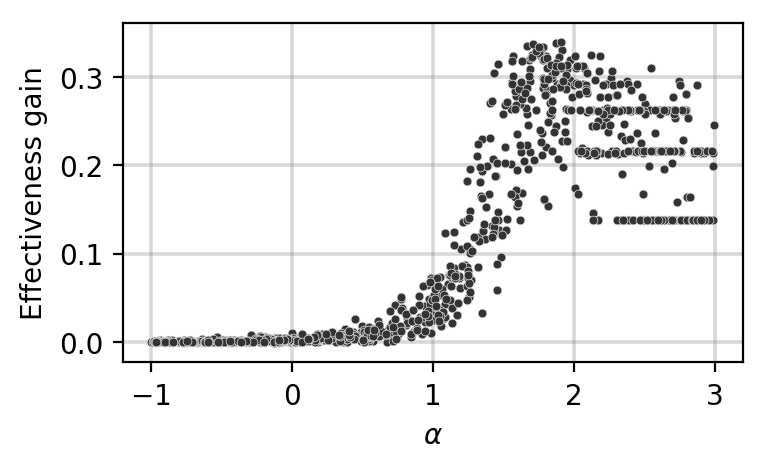

In [11]:
plt.rc('axes', axisbelow=True)

ei_gains = [i['ei_gain'] for i in out_alphas.values()]
eff_gains = [i['eff_gain'] for i in out_alphas.values()]

fig, ax = plt.subplots(1, 1, figsize=(4,2.25), dpi=200)

ax.scatter(alphas, eff_gains, marker='o', s=10, c='.2', lw=0.25, edgecolors='.9')

ax.set_ylabel('Effectiveness gain')
ax.set_xlabel(r'$\alpha$')
ax.grid(linestyle='-', linewidth=1.3, color='.5', alpha=0.3)

plt.show()